## Importation des différentes librairies dont nous avons besoin et ouverture d'une partie du fichier de données que nous allons étudier

In [1]:
# Import all the libraries we need for the brief
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Reading of the TSV file by choosing the 10000 first rows
read_food_data = pd.read_csv('/home/apprenant/Documents/Brief-5-Rachid-Karbiche/data/01_raw_data/en.openfoodfacts.org.products.tsv', sep= '\t', nrows= 10000, low_memory= False)

# Showing all the rows and the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Comme le fichier de données est assez volumineux, j'ai introduit le paramètre nrows afin d'en lire les 10 000 premières entrées

In [2]:
read_food_data.loc[9990]

code                                                                                11822181334
url                                           http://world-en.openfoodfacts.org/product/0011...
creator                                                                         usda-ndb-import
created_t                                                                            1489135256
created_datetime                                                           2017-03-10T08:40:56Z
last_modified_t                                                                      1489135256
last_modified_datetime                                                     2017-03-10T08:40:56Z
product_name                                                           Tropical Splash Cocktail
generic_name                                                                                NaN
quantity                                                                                    NaN
packaging                               

In [3]:
for i in read_food_data.columns:
    print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

In [4]:
print(read_food_data.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' 

In [5]:
selected_data = read_food_data[['salt_100g','sodium_100g', 'alcohol_100g', 'vitamin-a_100g','beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g','vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g','vitamin-b6_100g', 'vitamin-b9_100g']]

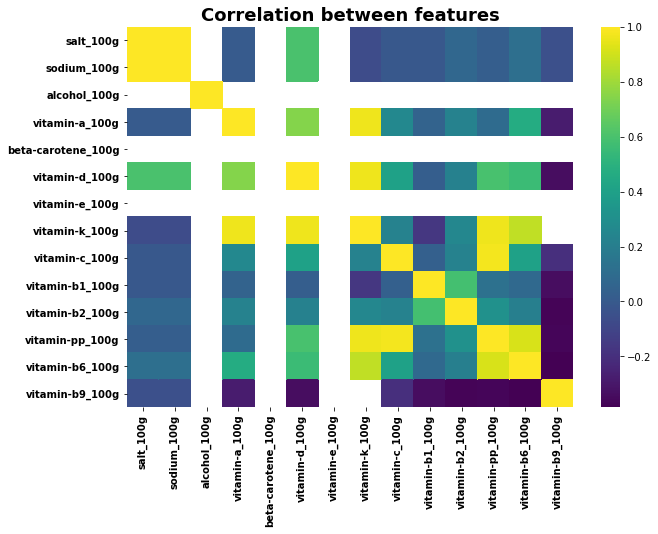

In [6]:
selected_data_corr = selected_data.corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(selected_data_corr, cmap='viridis')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()